In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
from tensorflow import keras
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

Obtaining data

In [27]:
df1 = pd.read_excel('D:/real_estate_python/dane_1050_bezOdst.xlsx', sheet_name=0) 
df1

,Unnamed: 0,liczba pokoi,pow przynależna,pu lokalu,cena mkw,road_distance,road_time,kondygnacja,odl bagatela,odl dworzec,odl lotnisko
0,0,2,1,43.41,10827.00,5613,1056,2,4.248644,4.369925,8.979016
1,1,1,1,41.57,12244.41,7479,977,3,4.141580,4.479480,8.267711
2,2,2,1,56.99,11335.32,5754,1083,3,4.356337,4.443816,9.070740
3,3,1,0,42.50,10376.47,6910,971,3,3.828221,4.152898,8.462785
4,4,2,0,56.83,11789.55,7444,955,4,4.047565,4.398711,8.268432
...,...,...,...,...,...,...,...,...,...,...,...
919,935,2,1,51.87,5398.11,5761,905,4,3.477827,4.120481,7.754680
920,936,3,1,69.10,8248.91,2413,481,4,1.958246,2.881280,8.607197
921,937,2,1,37.98,11005.79,5094,844,2,3.878633,4.731363,6.876775
922,938,1,0,49.00,10714.29,7341,1034,1,5.702747,6.805263,4.773887


Preparing data

In [28]:
from sklearn.model_selection import train_test_split

X = df1[['liczba pokoi', 'pow przynależna', 'pu lokalu', 'road_distance', 'road_time', 'kondygnacja', 'odl bagatela',
       'odl dworzec', 'odl lotnisko']]
y = df1['cena mkw']

training_set = X
prediction_set = y
X_train, X_test, y_train, y_test = train_test_split(training_set, prediction_set, test_size=0.2, random_state=0)


In [29]:
train_x = np.asarray((X_train.values.tolist()))
train_y = np.asarray((y_train.values.tolist()))
test_x = np.asarray((X_test.values.tolist()))
test_y = np.asarray((y_test.values.tolist()))

In [30]:
train_mean = np.mean(train_x, axis=0)
print(train_mean)
print("\n")
train_std = np.std(train_x, axis=0)
print(train_std)
print("\n")
train_x = (train_x - train_mean) / train_std
print(train_x)

[1.86468200e+00 2.66576455e-01 4.95977808e+01 4.45280244e+03
 7.63209743e+02 3.32341001e+00 3.06269141e+00 3.37644169e+00
 9.16820658e+00]


[8.40829058e-01 4.42169027e-01 2.01523152e+01 1.80972340e+03
 2.17602226e+02 2.30070443e+00 1.34873065e+00 1.36639817e+00
 1.82392632e+00]


[[ 2.53953878  1.65869498  2.31001841 ...  1.62160412  1.88924152
  -1.63400692]
 [-1.02836836  1.65869498 -0.84942006 ...  1.12641267  0.15100209
   2.11144007]
 [ 2.53953878  1.65869498  3.37738956 ... -0.43103484 -0.0295632
  -0.53722658]
 ...
 [-1.02836836 -0.6028836  -1.24838166 ... -1.18080793 -1.40919984
   0.63721987]
 [-1.02836836 -0.6028836  -0.54474043 ...  1.03063704  0.62638744
   0.54275077]
 [-1.02836836 -0.6028836  -0.69509536 ...  1.0595232   0.23224458
   1.66648242]]


Modeling data

In [31]:
def build_model():
    model = keras.Sequential([
        Dense(32, activation=tf.nn.relu, input_shape=[len(train_x[0])]),
        Dense(16, activation=tf.nn.relu),
        Dense(1),
    ])

    model.compile(optimizer=tf.optimizers.Adam(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

In [32]:
class check(keras.callbacks.Callback):
    def epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history = model.fit(train_x, train_y, epochs=300, verbose=1, validation_split = 0.1,
                    callbacks=[early_stop, check()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Epoch 1/300
21/21 [==============================] - 1s 11ms/step - loss: 110860192.0000 - mae: 10337.6660 - mse: 110860192.0000 - val_loss: 114805208.0000 - val_mae: 10562.7500 - val_mse: 114805208.0000
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 110847784.0000 - mae: 10337.0645 - mse: 110847784.0000 - val_loss: 114791352.0000 - val_mae: 10562.0879 - val_mse: 114791352.0000
Epoch 3/300
21/21 [==============================] - 0s 5ms/step - loss: 110833904.0000 - mae: 10336.3857 - mse: 110833904.0000 - val_loss: 114773928.0000 - val_mae: 10561.2539 - val_mse: 114773928.0000
Epoch 4/300
21/21 [==============================] - 0s 4ms/step - loss: 110814240.0000 - mae: 10335.4346 - mse: 110814240.0000 - val_loss: 114747520.0000 - val_mae: 10559.9951 - val_mse: 114747520.0000
Epoch 5/300
21/21 [==============================] - 0s 3ms/step - loss: 110784064.0000 - mae: 10333.9668 - mse: 110784064.0000 - val_loss: 114707456.0000 - val_mae: 10558.0879 - val_mse:

In [33]:
print(hist['val_mse'])

0      1.148052e+08
1      1.147914e+08
2      1.147739e+08
3      1.147475e+08
4      1.147075e+08
           ...     
295    3.405068e+06
296    3.385536e+06
297    3.400054e+06
298    3.384191e+06
299    3.378198e+06
Name: val_mse, Length: 300, dtype: float64


Results

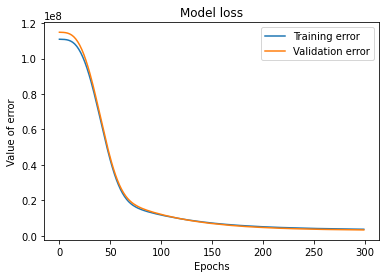

In [34]:
plt.title('Model loss')
plt.ylabel('Value of error')
plt.xlabel('Epochs')
plt.plot(hist['loss'], label='Training error')
plt.plot(hist['val_loss'], label='Validation error')
plt.legend()
plt.show()

In [35]:
test_x_norm = (test_x - train_mean) / train_std
mse, _, _ = model.evaluate(test_x_norm, test_y)
rmse = np.sqrt(mse)
acc = float((1-rmse/10312.08)*100)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 2)))
print('Accuracy: {}%'.format(round(acc, 2)))

6/6 [==============================] - 0s 2ms/step - loss: 4467540.5000 - mae: 1618.0087 - mse: 4467540.5000
Root Mean Square Error on test set: 2113.66
Accuracy: 79.5%
